In [1]:
from uadapy.dr.vipurpca import compute_distribution_trajectories
import uadapy.data as data

# Loading data
We provide ready-to-use toy datasets for getting started with the analysis quickly. In this example, we fit distributions to the points of the iris-dataset.

In [2]:
dists = data.load_iris()

# Computing Distribution trajectories
We compute trajectories of each distribution in principal component (PC) space by
sampling the uncertainty of the PCA eigenvectors. Each trajectory represents how the
projection of a distribution’s mean evolves under uncertainty, resulting in a sequence
of points in PC space for every distribution.

In [3]:
trajectories  = compute_distribution_trajectories(dists, n_components=2, n_frames=10, seed=55)

# Visualizing Distribution trajectories
We visualize the computed trajectories by projecting them onto a selected pair of
principal components.

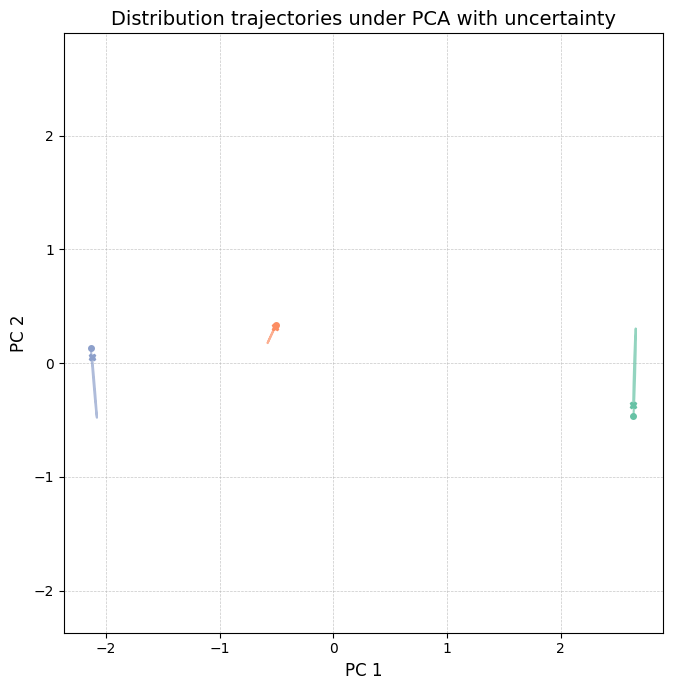

In [4]:
import matplotlib.pyplot as plt
import uadapy.plotting.utils as utils

# choose PCs (0-based)
pcx, pcy = 0, 1

# trajectories: (n_frames, n_samples, n_components)
traj_2d = trajectories[:, :, [pcx, pcy]]

n_frames, n_samples, _ = traj_2d.shape

# one distinct color per trajectory
colors = utils.get_colors(n_samples)

fig, ax = plt.subplots(figsize=(8, 7))

for i in range(n_samples):
    t = traj_2d[:, i, :]
    c = colors[i]
    ax.plot(t[:, 0], t[:, 1], lw=1.5, color=c, alpha=0.7)
    ax.plot(t[0, 0], t[0, 1], "o", color=c, markersize=4)
    ax.plot(t[-1, 0], t[-1, 1], "X", color=c, markersize=5)

ax.set_xlabel(f"PC {pcx + 1}", fontsize=12)
ax.set_ylabel(f"PC {pcy + 1}", fontsize=12)
ax.set_title("Distribution trajectories under PCA with uncertainty", fontsize=14)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
ax.set_aspect("equal")
ax.set_ylim(ax.get_xlim())

plt.tight_layout()
plt.show()
